**Student ID: 45248877
<br>
Name: Taiga Takeda
<br>
Email: taiga.takeda@students.mq.edu.au
<br>
Class: Tuesday, 1pm-2:55pm, Practical_1(4)**

# Portfolio 1

# Analysis of Cycling Data

## Import

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [25]:
strava = pd.read_csv('Portfolio1_data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('Australia/Sydney')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-03 07:47:51+11:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 12:36:53+11:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 13:56:00+11:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 16:37:04+11:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-06 06:22:46+11:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [26]:
cheetah = pd.read_csv('Portfolio1_data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.

In [27]:
#Join strava and cheetah data
df=strava.join(cheetah, how ='inner')
df.head(5)

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Required Analysis


1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


# Question 1: Remove rides with no measured power

In [28]:
#Remove rides with no measured power
df=df.drop(df.index[df.device_watts==False])
df.head(5)

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-10 06:18:03+11:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


# Question 2: Time, Distance, Average speed, Average power, TSS.

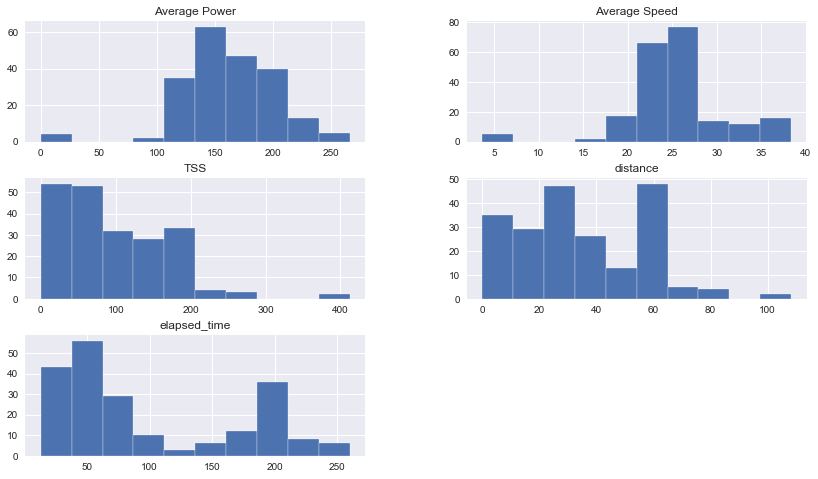

In [29]:
# Combine the dataframe to df1 and display histogram for each variable
df1= df[['elapsed_time','distance','Average Speed', 'Average Power', 'TSS']]
df1.hist(density=0,figsize=(14,8))
plt.show()

## Are they normally distributed? Skewed?

For a histogram to be normally distributed, the sample size of the data must be large enough and must be a bell shaped like curve. The following shapes of the histogram:

**Time:**
The histogram seems to be right skewed.

**Distance:**
The histogram seems to be right skewed.

**Average speed:**
The histogram seems to be normally distributed as it has a bell shaped like curvee

**Average Power:**
The histogram seems to be normally distributed as it has a bell shaped like curve

**TSS:**
The histogram seems to be right skewed.

# Question 3: Relationships between the variables

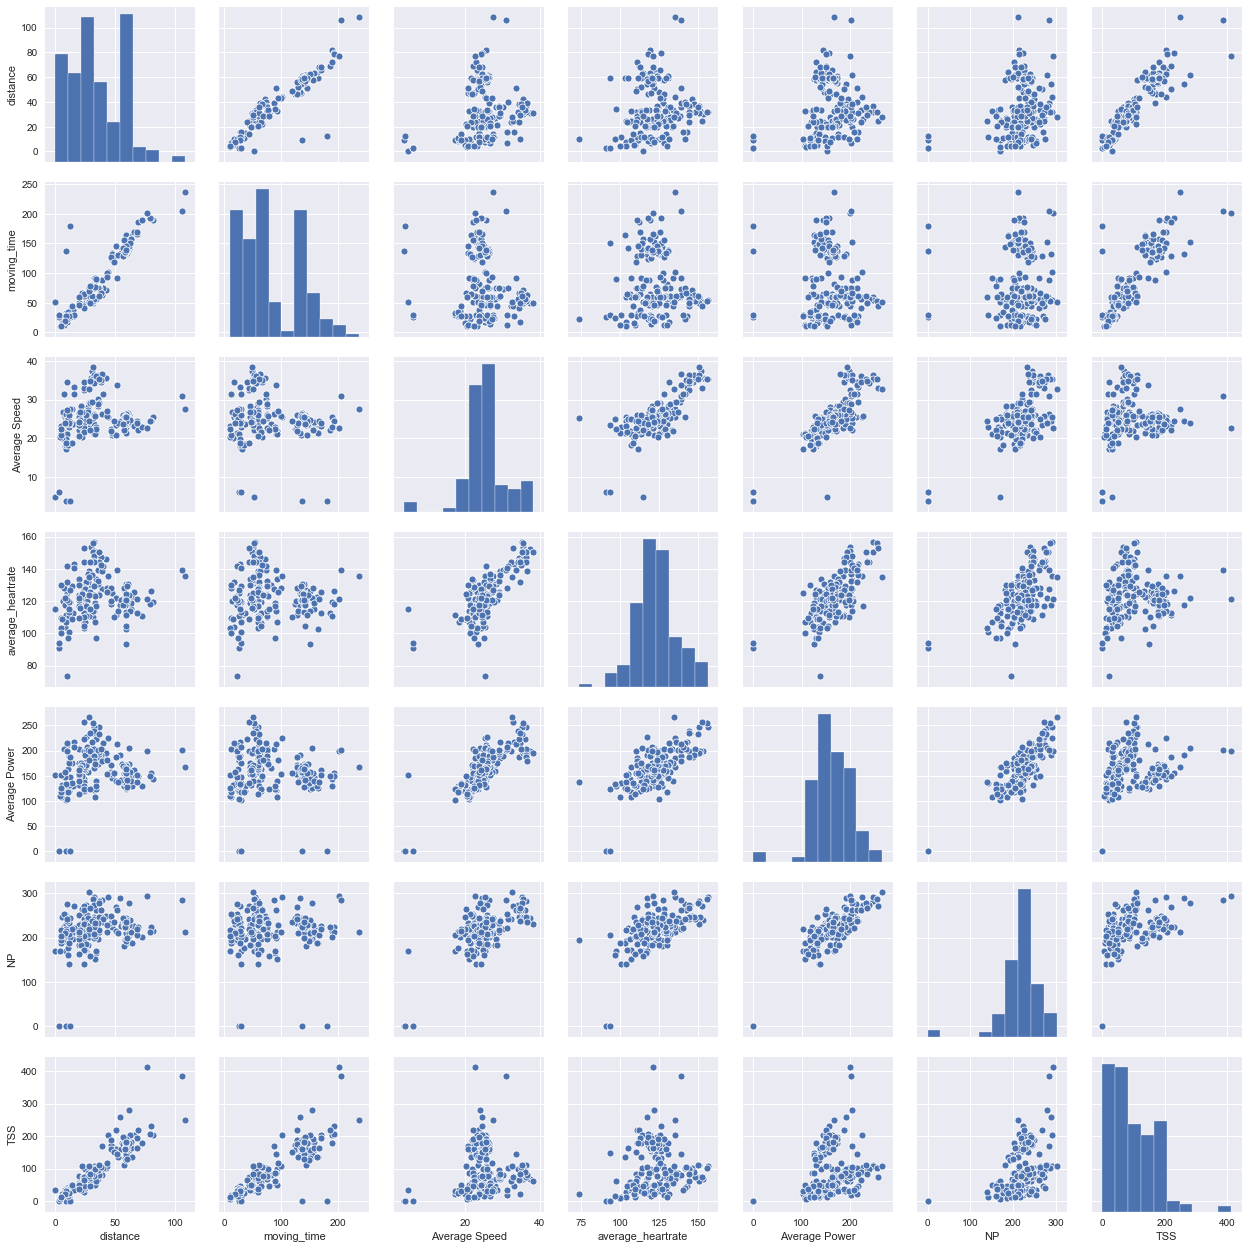

In [30]:
sns.pairplot(df[['distance', 'moving_time', 'Average Speed', 'average_heartrate', 
                 'Average Power', 'NP', 'TSS', 'elevation_gain']])

# Comment
From our observation for this data, there is evidence to suggest that some of these variables have a strong correlation against another. For example, we can see a strong positive linear relationship between distance and moving time which suggests that they can compatible. However, there are some variables that do not correlate with each other, such as moving time and average watts variables. Looking at our scatter plot with the two variables that I just mentioned, we can assume that the plots are scattered all over without any linear relationships and do not form any kind of correlation. Overall, the many of the histograms seems to be normally distributed and many of the scatter plots seems to have a positive linear relation.

# Question 4 Part 1: Scatter Plots
We want to explore the differences between the three categories: Race, Workout and Ride.
Use scatter plots with different colours for each category to explore how these categories differ.
Use histograms or box plots to visualise the different distributions of a variable for the three categories.
In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).

Before plotting down our scatter plots, I have plotted a counter plot to display the amount of each workout type.
From our observation, there were 140 people who rode their bikes and less than 40 people who rode for the race or rode for a workout

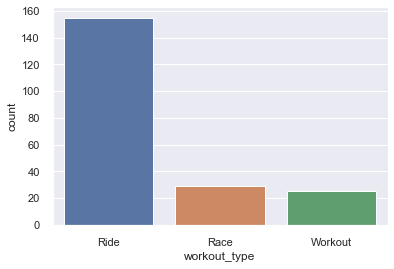

In [31]:
#Counter plot for workout type
sns.set(style="darkgrid")
sns.countplot(x='workout_type', data =df)

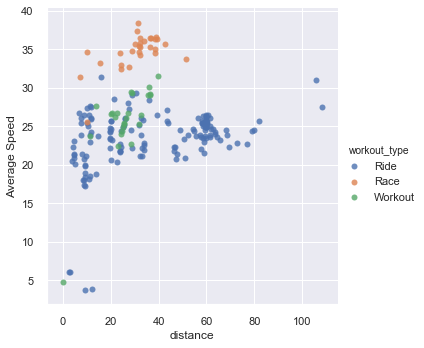

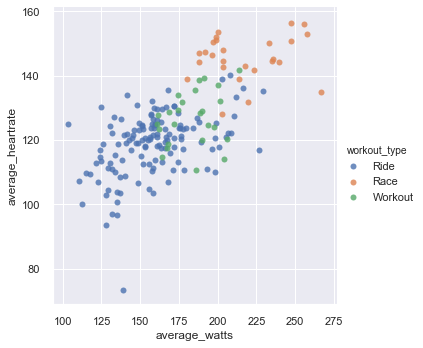

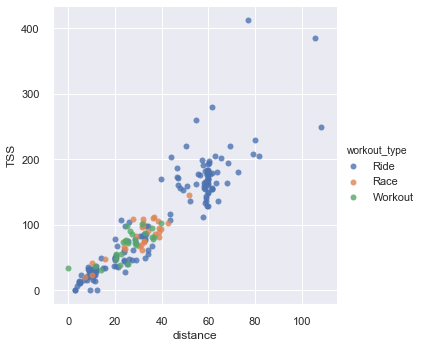

In [32]:
#Scatter plots
sns.lmplot(x='distance',y='Average Speed', data=df, fit_reg=False,hue='workout_type')
sns.lmplot(x='average_watts',y='average_heartrate', data=df, fit_reg=False,hue='workout_type')
sns.lmplot(x='distance',y='TSS', data=df, fit_reg=False,hue='workout_type')

## Comment

For my scatter plots, I made these three as my final output because they all form a strong linear relationship. It is also interesting to see that some riders who ride for fun have higher speed and produce more power than other riders who do workouts or compete in a race.   

# Question 4 part 2: Boxplot

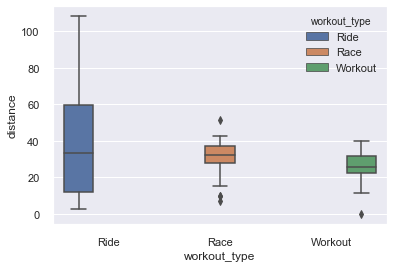

In [33]:
#box plot for distances
sns.boxplot(x="workout_type", y="distance", data=df, hue ='workout_type' )

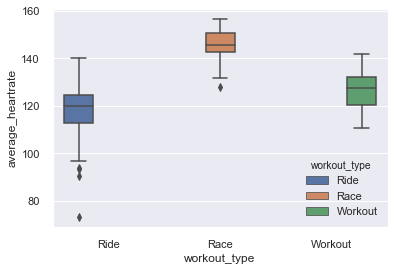

In [34]:
#box plot for average heartrate
sns.boxplot(x="workout_type", y="average_heartrate", data=df, hue ='workout_type')

## Comment

For my boxplot, I have made these two as my final output because they both formed an interesting result. In my first boxplot, the distance for each workout type had roughly the same median. This meant that for each workout type, almost people in the average ride the same distance. 

For my second boxplot, the training test score for each workout type had also the same level of median. I assumed my result for Race or workout to be higher than ride on the median level, but what I had predicted was wrong. Thus, this is why I had put these two boxplots as my final outputs.

## Question 4 part 2: Histogram

Text(0, 0.5, 'Count')

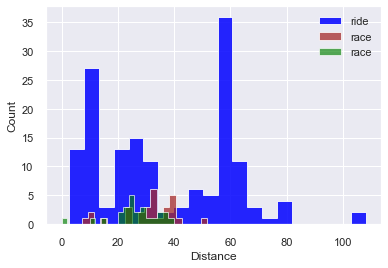

In [35]:
# call the following variables from the dataframe and get the workout type
ride = df[df['workout_type']=='Ride']
race = df[df['workout_type']=='Race']
workout = df[df['workout_type']=='Workout']

# initialise new variables to the specific workout type under distance
ride_distance = ride['distance']
race_distance = race['distance']
workout_distance = workout['distance']

# plot combined histogram distance
ride_distance.hist(density=0, histtype='stepfilled', color='blue', bins =20, label='ride', alpha = 0.85)
race_distance.hist(density=0, histtype='stepfilled', color='brown', bins =20, label='race',alpha = 0.75)
workout_distance.hist(density=0, histtype='stepfilled', color='green', bins =20, label='race',alpha=0.65)
plt.legend(loc='best')
plt.xlabel('Distance')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

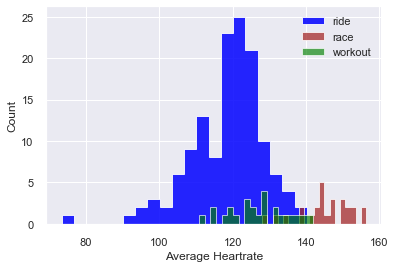

In [36]:
# initialise new variables to the specific workout type under average_heartrate
ride_average_h = ride['average_heartrate']
race_average_h = race['average_heartrate']
workout_average_h = workout['average_heartrate']

# plot combined histogram for average heartrate
ride_average_h.hist(density=0, histtype='stepfilled', color='blue', bins =20, label='ride', alpha = 0.85)
race_average_h .hist(density=0, histtype='stepfilled', color='brown', bins =20, label='race',alpha = 0.75)
workout_average_h.hist(density=0, histtype='stepfilled', color='green', bins =20, label='workout',alpha=0.65)
plt.legend(loc='best')
plt.xlabel('Average Heartrate')
plt.ylabel('Count')

## Challenge part 1: Show a plot and comment on any relationship you observe

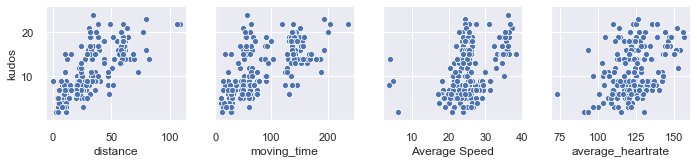

In [37]:
sns.pairplot(data=df,y_vars='kudos',x_vars=['distance','moving_time','Average Speed','average_heartrate'])

## Comment
In these scatterplots, we can assume that if more kudos is generated, then the measure of the main variables (x_vars) will become larger

## Challenge part 2: Generate a plot that summarises the number of km ridden each month over the period of the data

Text(0, 0.5, 'Distance (km), TSS, Average speed')

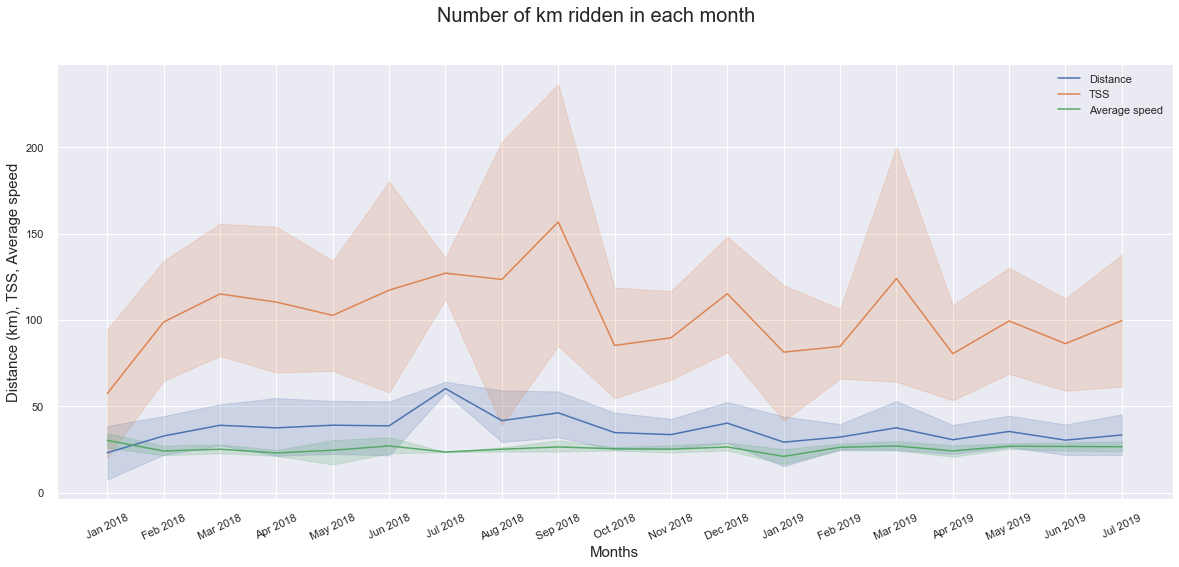

In [38]:
# import date time as timedelta
from datetime import timedelta

# extract month from date
df['Months'] = pd.to_datetime(df['date'])
df['Month-str'] = df['Months'].dt.strftime('%b %Y')

# plot graph
fig, k = plt.subplots(figsize=(20, 8))
k = sns.lineplot(x='Month-str',y='distance',data=df, sort=False, label ='Distance')
l = sns.lineplot(x='Month-str',y='TSS',data=df, sort=False, label ='TSS')
m = sns.lineplot(x='Month-str',y='Average Speed',data=df, sort=False, label ='Average speed')
plt.xticks(rotation=25)
fig.suptitle('Number of km ridden in each month', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Distance (km), TSS, Average speed', fontsize=15)

## Comment

To complete this plot, I have first used the information from [Stackoverflow](https://stackoverflow.com/questions/51102615/get-month-from-date-column) to extract the months from date time. For my first task I have just added months as my 'x' and distance as my 'y'. I then added the other two features, 'TSS' and 'Average Speed' and got to see some amazing results. On average the Training stress score was consistently above around 70 after the first month and a slight increase for the average distance throughout the year. However, the average speed had a consistent frequency throught the year and did not increase or decrease as much.

## Challenge part 3: Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown

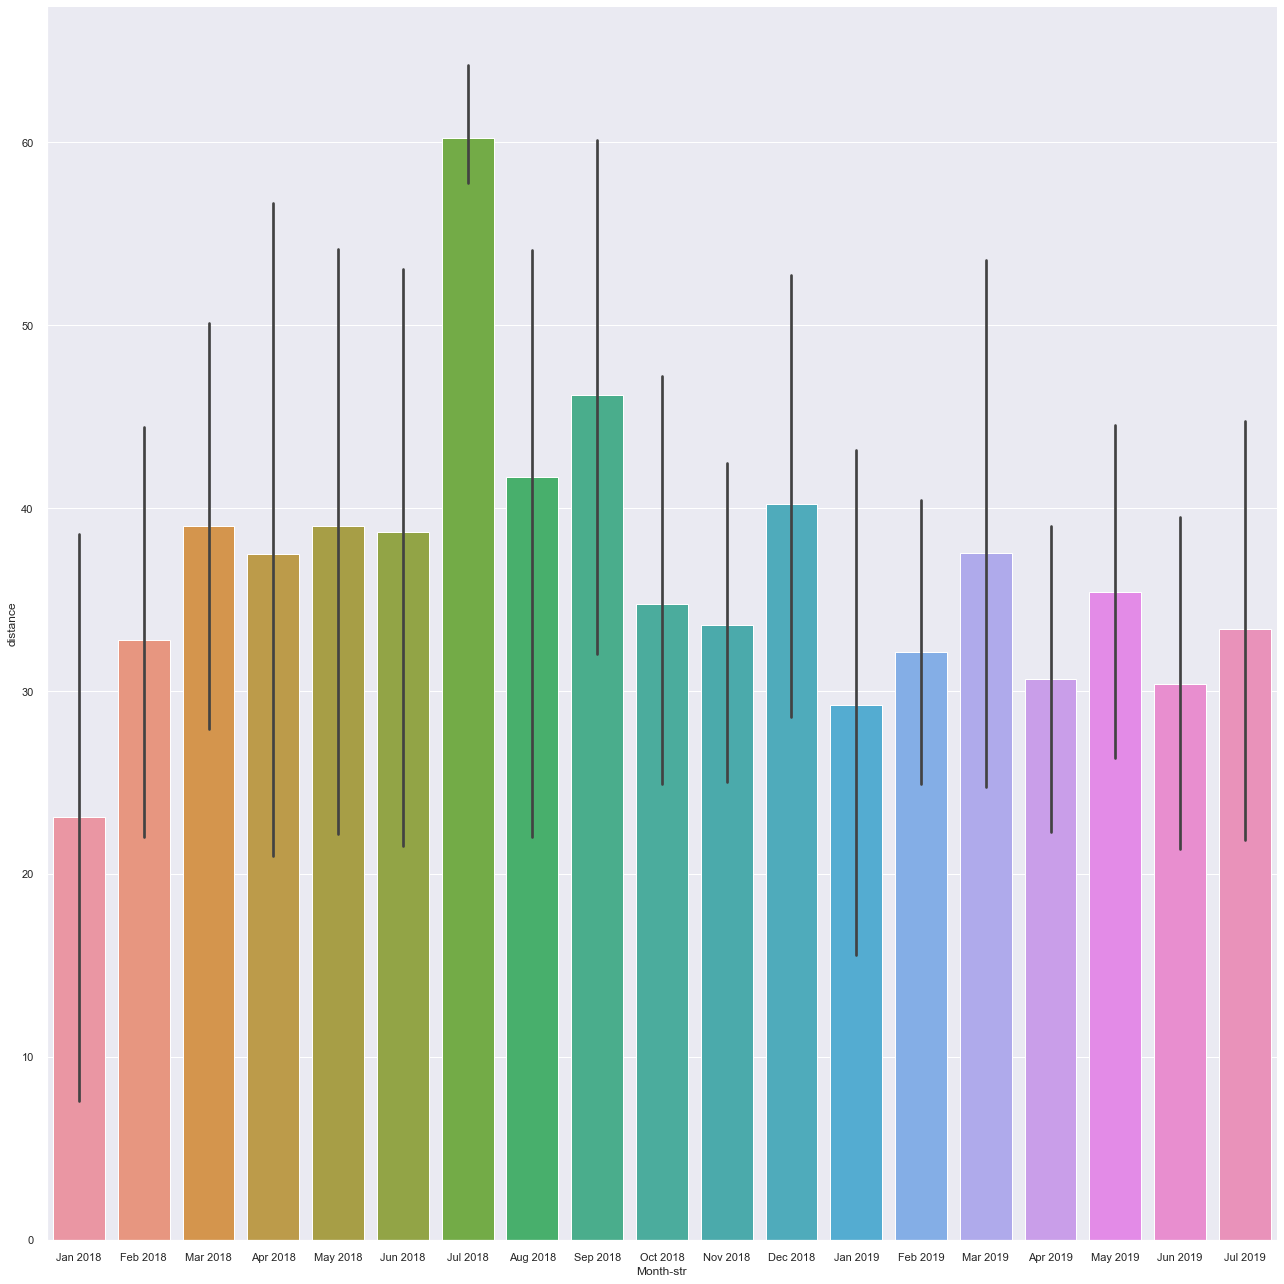

In [39]:
sns.catplot(x='Month-str', y ='distance', data=df, kind="bar", height=18)

## Comment

I have used a [group barplot](https://seaborn.pydata.org/examples/grouped_barplot.html) for this challenge question. This graph shows the activity over each month with the sum of the values for each day of the month. We can see that there are some outliers in some of the the months and the highest distance that was ridden was Aug 2018.

# Portfolio 2

# Data driven prediction models of energy use of appliances in a low-energy house

## Imports

In [40]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading [Energy data](https://github.com/LuisM78/Appliances-energy-prediction-data)

In [41]:
Energy_data = pd.read_csv("Portfolio2_data/energydata_complete.csv")
Energy_data['date'] = pd.to_datetime(Energy_data['date'])
Energy_data.index = Energy_data['date']
Energy_data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## A list of variables

**Here are definitions of the important fields in the data**:
* date time year-month-day hour:minute:second 
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chièvres weather station), in Celsius
* Pressure (from Chièvres weather station), in mm Hg
* RH_out, Humidity outside (from Chièvres weather station), in %
* Windspeed (from Chièvres weather station), in m/s
* Visibility (from Chièvres weather station), in km
* Tdewpoint (from Chièvres weather station), °C
* rv1, Random variable 1, nondimensional
* rv2, Rnadom variable 2, nondimensional

## Two Pie chart analyses for percentage of all delivered energy

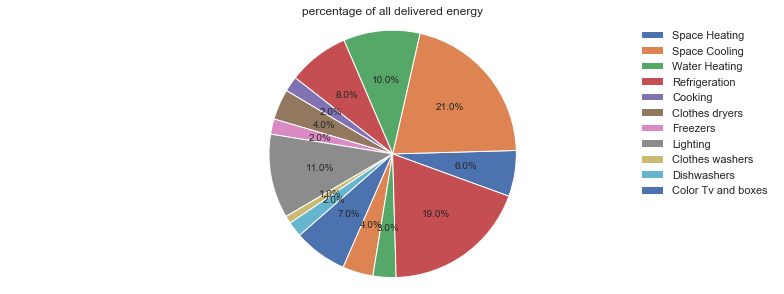

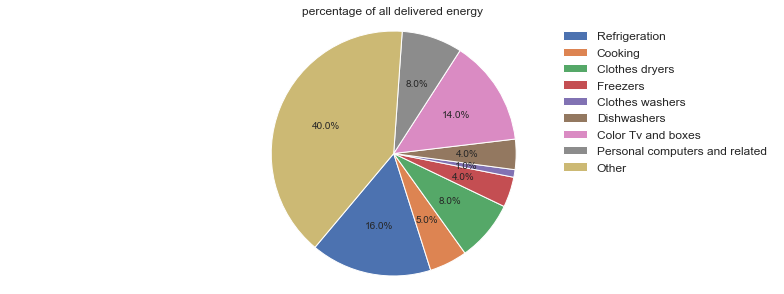

In [42]:
#1st pie chart for Residential electrical energy consumption
labels_one= ['Space Heating', 'Space Cooling', 'Water Heating', 'Refrigeration', 'Cooking', 'Clothes dryers', 'Freezers',
         'Lighting', 'Clothes washers', 'Dishwashers', 'Color Tv and boxes']
sizes_label_1 = [6, 21, 10, 8, 2, 4, 2, 11, 1, 2, 7,4,3,19]

fig1, ax1 = plt.subplots(figsize=(11,4))


patches, texts, autotexts = ax1.pie(sizes_label_1,autopct='%1.1f%%', startangle=340,)
plt.legend(patches, labels_one, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("percentage of all delivered energy")
plt.show()

#2nd pie chart for Residential electrical energy consumption  
#Note: Space heating, Space cooling, Lighting and Water Heating contributions have been removed from their pie chart
labels_two =['Refrigeration', 'Cooking', 'Clothes dryers', 'Freezers', 'Clothes washers', 'Dishwashers',
             'Color Tv and boxes', 'Personal computers and related', 'Other']
sizes_label_2 = [16, 5, 8, 4, 1, 4, 14, 8, 40]

fig2, ax2 = plt.subplots(figsize=(11,4))


patches, texts, autotexts = ax2.pie(sizes_label_2,autopct='%1.1f%%', startangle=230,)
plt.legend(patches, labels_two, loc="best",prop={'size': 12})
ax2.axis('equal')  
plt.tight_layout()
plt.title("percentage of all delivered energy")
plt.show()

## Comment on  Pie chart

For this pie chart, I have recreated this by taking an example from [A better visualisation of Pie charts by MatPlotLib.](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) Althought the colours of the model are not the same, the size, labels and the fonts are similar to the author's pie chart. The first pie chart includes all appliances that residents used and in the second pie chart, some appliances have been mentioned as others according to the author

## Relationship between the energy consumption of appliances (pairplot)

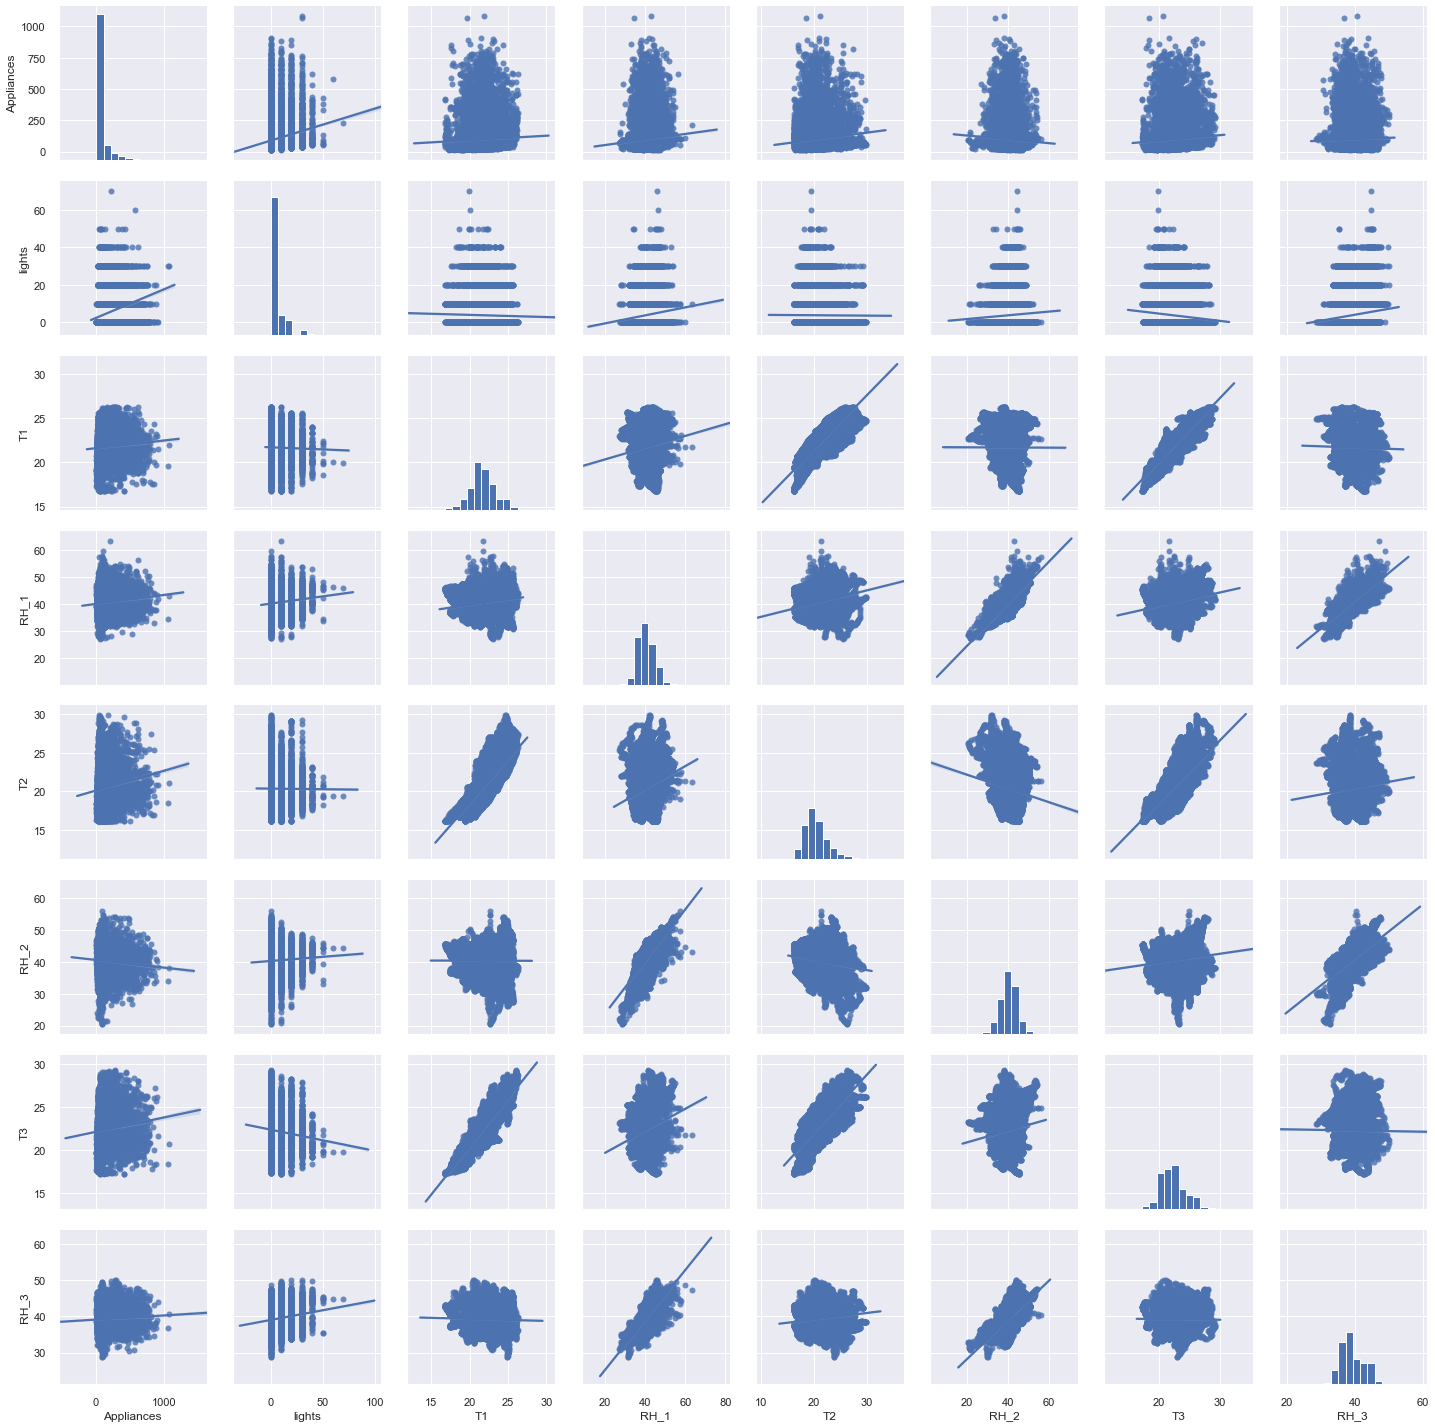

In [43]:
#pair plots relationship between the energy consumption of appliances
multiplots = sns.pairplot(Energy_data[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']], 
                          kind="reg", diag_kind='hist')

## Histogram and boxplot for Appliances energy consumption measurement for the whole period

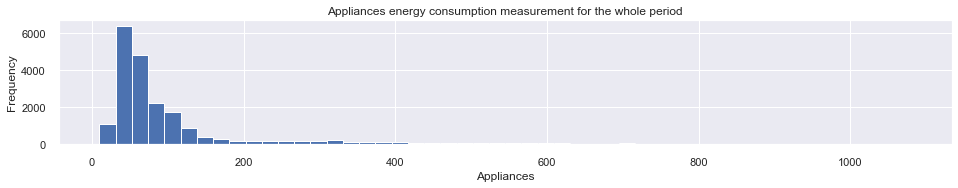

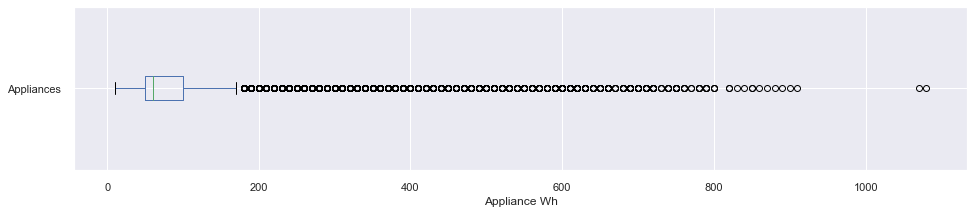

In [44]:
# histogram for appliances and boxplot

# histogram
fig = plt.figure(figsize=(16,5))
ax3 = fig.add_subplot(2,1,1)
g = ax3.hist(Energy_data['Appliances'], bins =50)
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Appliances')
plt.ylabel('Frequency')
plt.show()

# boxplot
Energy_data.boxplot(column='Appliances', vert=False, figsize=(16,3))
plt.xlabel("Appliance Wh")
plt.show()

## Heatmap of Energy Consumption

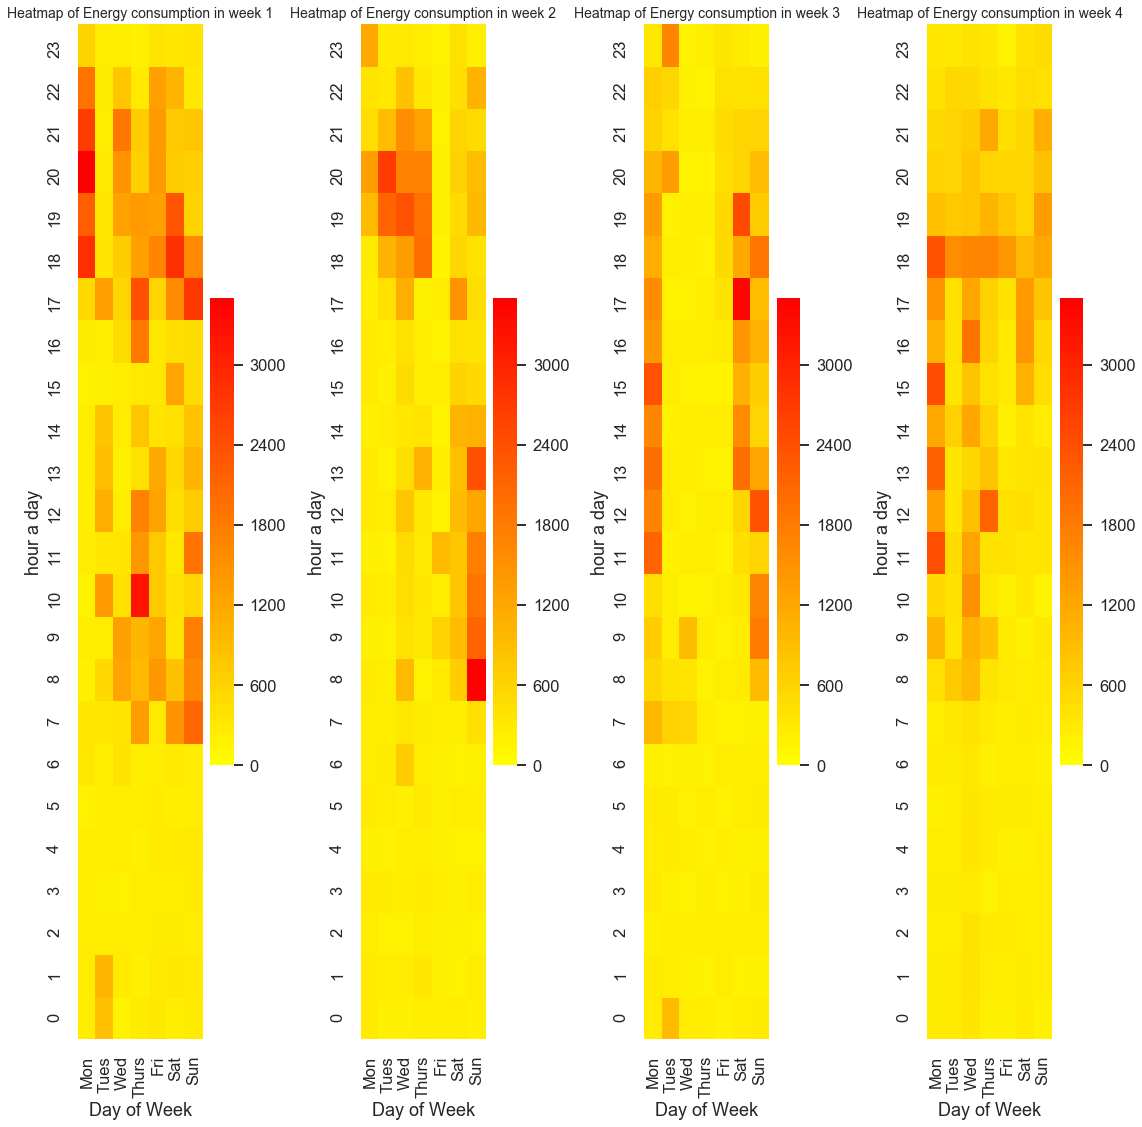

In [45]:
# import datetime as timedelta
from datetime import timedelta
d = timedelta(microseconds=-1)

# Create new date time as start_time_datetime and add weekday name and hour in them
Energy_data['start_time_datetime'] = pd.to_datetime(Energy_data['date'])
Energy_data['start_time_day_name'] = Energy_data['start_time_datetime'].dt.weekday_name
Energy_data['start_time_hour'] = Energy_data['start_time_datetime'].dt.hour

# Weekly time calculation
days = timedelta(days=7)
first_week = pd.Timestamp(2016,1,19)
second_week = first_week + days
third_week = second_week + days
fourth_week = third_week + days

# Boolean to set amount of days in a week
week_1 = Energy_data[Energy_data['start_time_datetime'] < first_week]
week2 = Energy_data[first_week < Energy_data['start_time_datetime']] 
week_2 = week2[Energy_data['start_time_datetime'] < second_week]
week3 = Energy_data[second_week < Energy_data['start_time_datetime']] 
week_3 = week3[Energy_data['start_time_datetime'] < third_week]
week4 = Energy_data[third_week < Energy_data['start_time_datetime']] 
week_4 = week4[Energy_data['start_time_datetime'] < fourth_week]

# amount of appliances used for each week calculation

# fisrt week 
app_used1= pd.pivot_table(week_1[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour1 = app_used1.unstack(level=0)
app_amount_used_hour1 = app_amount_used_hour1.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)
# second week
app_used2= pd.pivot_table(week_2[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour2 = app_used2.unstack(level=0)
app_amount_used_hour2 = app_amount_used_hour2.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)
# third week
app_used3= pd.pivot_table(week_3[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour3 = app_used3.unstack(level=0)
app_amount_used_hour3 = app_amount_used_hour3.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)

# fourth week
app_used4= pd.pivot_table(week_4[['start_time_day_name', 'start_time_hour', 'Appliances']], 
                                    index=['start_time_day_name', 'start_time_hour'], aggfunc='sum')
app_amount_used_hour4 = app_used4.unstack(level=0)
app_amount_used_hour4 = app_amount_used_hour4.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                        'Saturday', 'Sunday'], axis=1, level=1)

#functions for hours and shorten day names
hours = []
for hour in range(24):
    hours.append(hour)
    
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
# Plotting heatamp
sns.set_context("talk")
fig, (axis1,axis2,axis3,axis4) = plt.subplots(figsize=(16, 16),ncols=4)

# Week 1
axis1 = sns.heatmap(app_amount_used_hour1, annot=False, linewidths=0, ax=axis1,cmap="autumn_r", vmin=0, vmax=3500,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

axis1.axes.set_title("Heatmap of Energy consumption in week 1", fontsize=14, y=1)
axis1.set(xlabel='Day of Week', ylabel='hour a day');
axis1.invert_yaxis()

# Week 2
axis2 = sns.heatmap(app_amount_used_hour2, annot=False, linewidths=0, ax=axis2,cmap="autumn_r", vmin=0, vmax=3500,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

axis2.axes.set_title("Heatmap of Energy consumption in week 2", fontsize=14, y=1)
axis2.set(xlabel='Day of Week', ylabel='hour a day');
axis2.invert_yaxis()

# Week 3
axis3 = sns.heatmap(app_amount_used_hour3, annot=False, linewidths=0, ax=axis3,cmap="autumn_r", vmin=0, vmax=3500,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

axis3.axes.set_title("Heatmap of Energy consumption in week 3", fontsize=14, y=1)
axis3.set(xlabel='Day of Week', ylabel='hour a day');
axis3.invert_yaxis()

# Week 4
axis4 = sns.heatmap(app_amount_used_hour4, annot=False, linewidths=0, ax=axis4,cmap="autumn_r", vmin=0, vmax=3500,
                 cbar=True, xticklabels=day_short_names, yticklabels=hours)

axis4.axes.set_title("Heatmap of Energy consumption in week 4", fontsize=14, y=1)
axis4.set(xlabel='Day of Week', ylabel='hour a day');
axis4.invert_yaxis()

fig.tight_layout()

## Comment on Heatmap

I have used an example from [Dan Friedman's](https://dfrieds.com/data-visualizations/when-use-heatmaps) 'When to use heatmaps' and [CodeDump](https://codedump.io/share/K8Q5rHVeUFGS/1/heatmap-visualization) to make this heatmap. To get this colour, I went to this website [colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) to get the same colour in their heatmap. The heatmap I produced is very similar to the model they have, but the result of my heatmap produced a higher result for appliances used from week 1 to week 4. This could be because my heatmap has a standard deviation of 600 within each range and their model has standard deviation of 500 in each range.

## Linear Regression

In [46]:
#Read data
train = pd.read_csv("Portfolio2_data/training.csv")
test = pd.read_csv("Portfolio2_data/testing.csv")

# drop date and add the rest into feature_col
train.drop(train.columns[0], axis=1, inplace=True)
feature_col = np.array(['lights', 'T1', 'RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7',
                         'T8','RH_8','T9', 'RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint',
                         'rv1','rv2','NSM'])
test.drop(test.columns[0], axis=1, inplace=True)

# Set Train and test 
X_train = train[feature_col]
y_train = train.Appliances
X_test = test[feature_col]
y_test = test.Appliances

# test model
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("y = ", model.coef_,"* X + ",model.intercept_)
print("MSE:", mean_squared_error (y_test, predicted))
print("R^2:", r2_score(y_test,predicted))

y =  [ 1.86660516e+00 -4.14497987e+00  1.44790183e+01 -1.78426597e+01
 -1.37115412e+01  2.76620233e+01  5.34759535e+00 -2.51528298e+00
 -7.94526199e-01 -1.50241017e+00  9.21698362e-02  7.37898919e+00
  3.26591065e-01  2.00333400e+00 -1.74131349e+00  8.10390686e+00
 -3.64205959e+00 -1.33516314e+01 -3.25454078e-01 -1.01102847e+01
  1.86447658e-01 -9.03894716e-01  1.82733594e+00  1.33901648e-01
  4.19325863e+00 -2.45927477e-02 -2.45927477e-02  2.94814485e-04] * X +  -40.033625234844166
MSE: 8754.269104277757
R^2: 0.1519918339030859


## Residual plot for the linear regression model

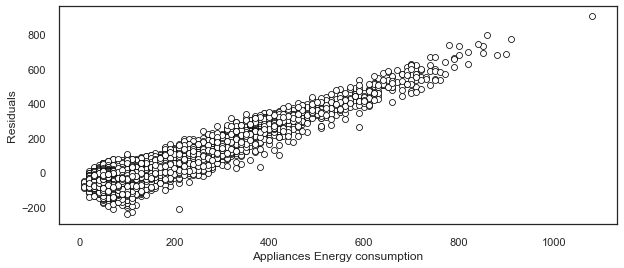

In [47]:
#Plotting it
sns.set(rc={'figure.figsize':(10,4)},style='white', font_scale=1)
y_hat = model.predict(X_train)
y = train['Appliances']
residual = y_train - y_hat
ax = sns.scatterplot(y,residual, color='white', edgecolor='black')
ax.set(xlabel='Appliances Energy consumption', ylabel='Residuals');

## Comments for my linear regression result

From the [Data driven prediction models of energy use of appliances in a low-energy house](https://github.com/LuisM78/Appliances-energy-prediction-data) I have used the **training** and **testing data** set from [git hub](https://github.com/LuisM78/Appliances-energy-prediction-data) that was provided for us to make this **linear regression model**.
The output of my model looks very similar to the output of their model and my calculations for the **mean squared error** and **r^2** can be assumed to be correct as they did not provide one. The reason I am assuming that my calculation may be correct, is because the model produced very similarly to their model. Also, I have used the examples from **week 10's tutorial class** for the training and testing data set: to train, test and drop unnecessary columns to produce this output.

## Recursive Feature Elimination

In [48]:
#fit my selected variables
estimator = LinearRegression()
selector = RFE(estimator, 28)
selector = selector.fit(X_train,y_train)
supp = selector.get_support()
print("Selected features:",feature_col[supp])
print("Coeffs:", selector.estimator_.coef_)

# test model
predicted = selector.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, predicted)))
print("R^2:", r2_score(y_test, predicted), "\n")

Selected features: ['lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4' 'T5' 'RH_5' 'T6'
 'RH_6' 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out' 'Press_mm_hg' 'RH_out'
 'Windspeed' 'Visibility' 'Tdewpoint' 'rv1' 'rv2' 'NSM']
Coeffs: [ 1.86660516e+00 -4.14497987e+00  1.44790183e+01 -1.78426597e+01
 -1.37115412e+01  2.76620233e+01  5.34759535e+00 -2.51528298e+00
 -7.94526199e-01 -1.50241017e+00  9.21698362e-02  7.37898919e+00
  3.26591065e-01  2.00333400e+00 -1.74131349e+00  8.10390686e+00
 -3.64205959e+00 -1.33516314e+01 -3.25454078e-01 -1.01102847e+01
  1.86447658e-01 -9.03894716e-01  1.82733594e+00  1.33901648e-01
  4.19325863e+00 -2.45927477e-02 -2.45927477e-02  2.94814485e-04]
RMSE: 93.56425120887656
R^2: 0.1519918339030859 



## Comments for my RFE results

From the [Data driven prediction models of energy use of appliances in a low-energy house](https://github.com/LuisM78/Appliances-energy-prediction-data) their **RMSE** and **R^2** produced **93.21** and **0.18**, and my **RMSE** and **R^2** produced **93.56** and **0.15**. To produce the root-mean-square-error for my result, I have selected all **28 features** as they are all important features and used the training and data model from my previous workout for the linear regression model. The result of my **RMSE** and **R^2** is a bit more higher than their provided result due to the inconsistency of the each others randomly selected data.

# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [49]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

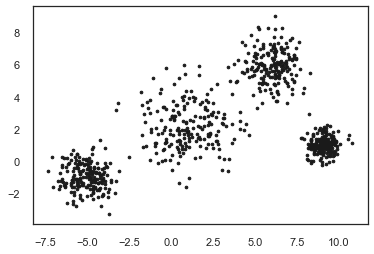

In [50]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

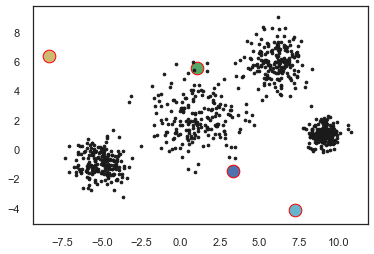

In [51]:
# initialise k and c
k=4
c=2

# set seed to 6
np.random.seed(6)

# Generate random centres
centre = np.random.randn(k,c)*np.std(data) + np.mean(data)

# array for colors
colors = ['g','b','y','c']

#Iterate centres
for i in range(k):
    plt.scatter(centre[i,0],centre[i,1], s= 160, color=colors[i], edgecolors='red')

# plot scatter
plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.